In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Sample _Superstore.csv",encoding = 'latin1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## changing object to data&time

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
#df[['Order Date', 'Ship Date']] = df[['Order Date', 'Ship Date']].apply(pd.to_datetime)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## break down the order date to years and month

In [11]:
df['Order Year']=df['Order Date'].dt.year

In [12]:
df['Order Month'], df['Order Day'] = df['Order Date'].dt.month, df['Order Date'].dt.day

## Monthly sales analysis

In [14]:
df['Month_Name'] = df['Order Date'].dt.month_name()

In [15]:
salesByMonth = df.groupby("Month_Name").agg({"Sales":"sum"}).sort_values(by = "Sales")
salesByMonth

,Sales
Month_Name,
February,59751.2514
January,94924.8356
April,137762.1286
July,147238.0970
June,152718.6793
May,155028.8117
August,159044.0630
October,200322.9847
March,205005.4888


In [16]:
salesByMonth = df.groupby("Order Month").agg({"Sales":"sum"})
salesByMonth

,Sales
Order Month,
1,94924.8356
2,59751.2514
3,205005.4888
4,137762.1286
5,155028.8117
6,152718.6793
7,147238.0970
8,159044.0630
9,307649.9457


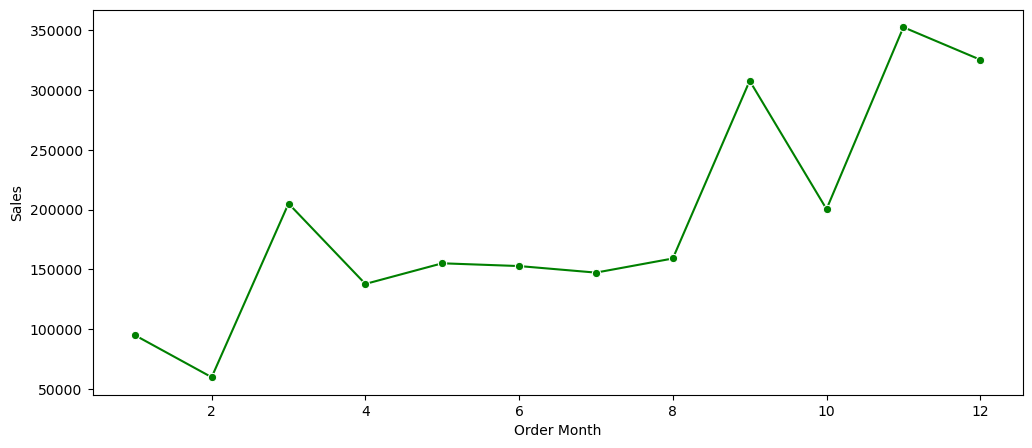

In [17]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=salesByMonth,x = 'Order Month',y = 'Sales', marker='o', color='green')
plt.show()

## Category wise sales analysis

In [19]:
SalesByCategory = df.groupby("Category").agg({"Sales":"sum"})
SalesByCategory

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


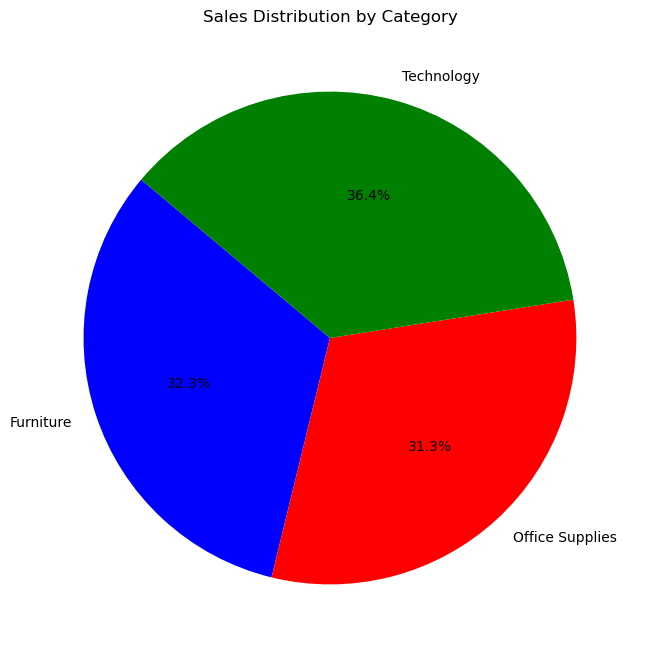

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(SalesByCategory['Sales'], labels=SalesByCategory.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green'])

plt.title("Sales Distribution by Category")
plt.show()

## sales analysis by sub category

In [22]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Order Day', 'Month_Name'],
      dtype='object')

In [23]:
salesBySubcategory = df.groupby("Sub-Category").agg({"Sales":"sum"})
salesBySubcategory

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


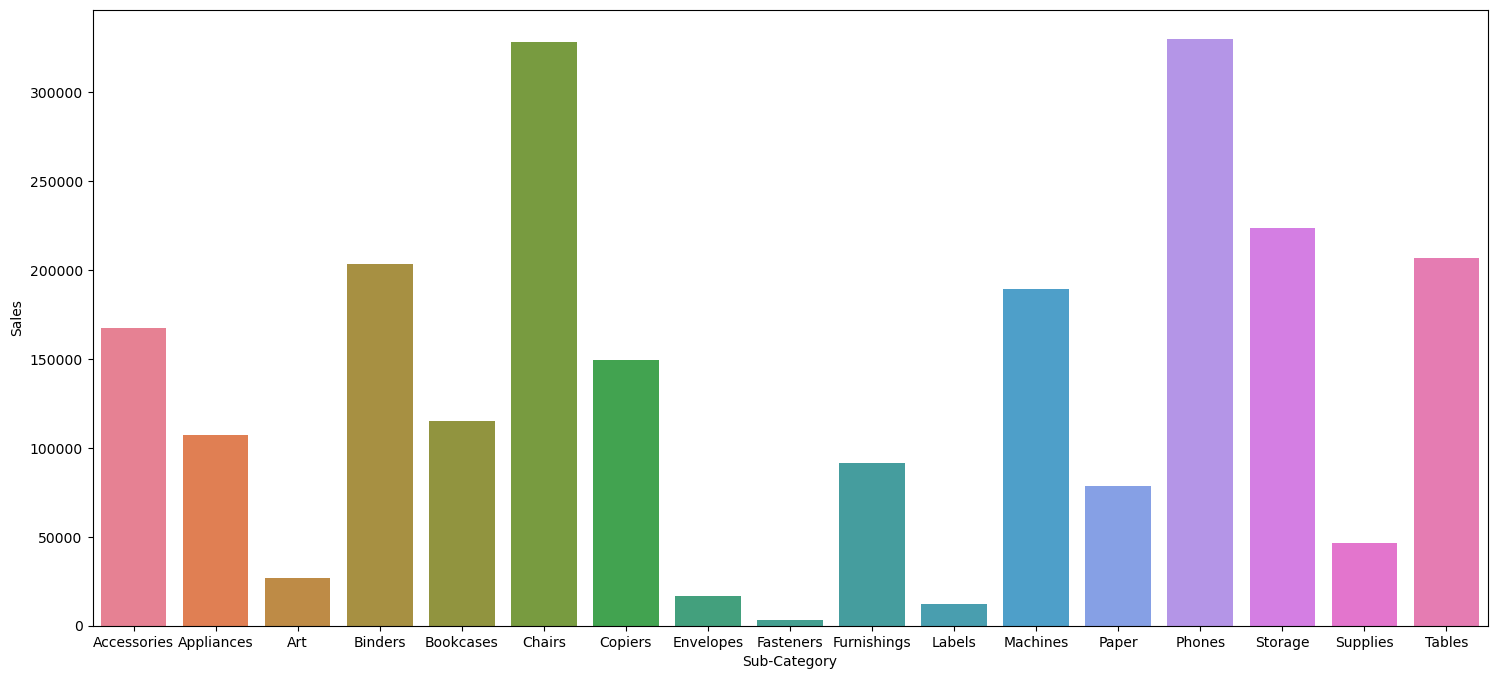

In [24]:
plt.figure(figsize=(18, 8))
sns.barplot(data =salesBySubcategory,x ="Sub-Category",y="Sales",hue = "Sub-Category")
plt.show()

## You need to analyze the monthly profit from sales and determine which month had the highest profit.

In [26]:
monthy_profit = df.groupby("Order Month").agg({"Profit":"sum"})
monthy_profit

,Profit
Order Month,
1,9134.4461
2,10294.6107
3,28594.6872
4,11587.4363
5,22411.3078
6,21285.7954
7,13832.6648
8,21776.9384
9,36857.4753


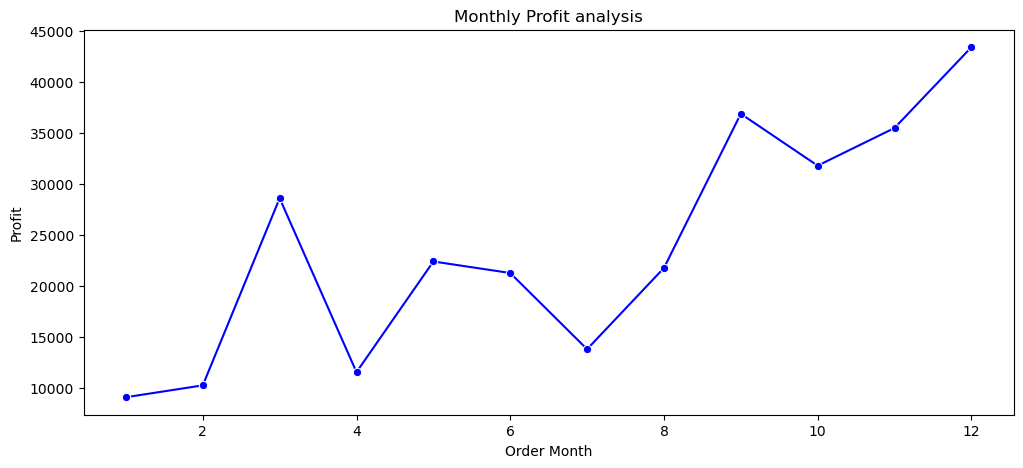

In [27]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthy_profit,x = 'Order Month',y = 'Profit', marker='o', color='blue')
plt.title("Monthly Profit analysis")
plt.show()

##  Analyze the profit by category and sub-category

In [29]:
categoryBy_profit = df.groupby("Category").agg({"Profit":"sum"})
categoryBy_profit

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


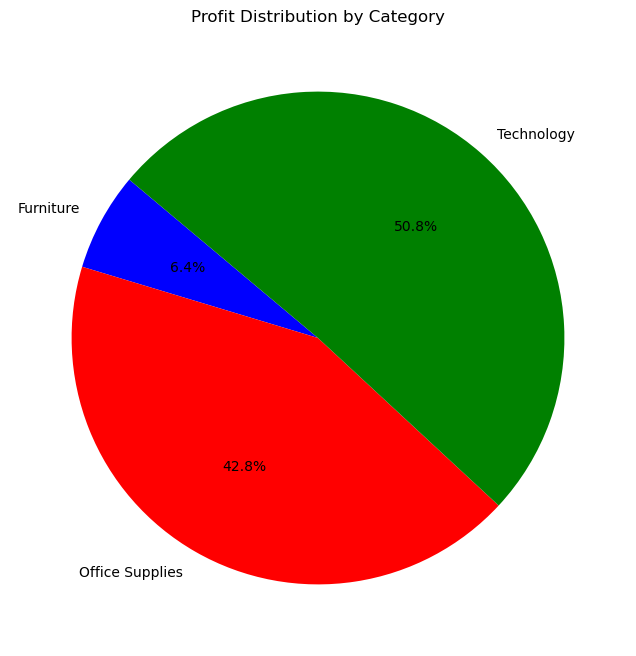

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(categoryBy_profit['Profit'], labels=categoryBy_profit.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green'])

plt.title("Profit Distribution by Category")
plt.show()

In [31]:
SubcategoryBy_profit = df.groupby("Sub-Category").agg({"Profit":"sum"})
SubcategoryBy_profit

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


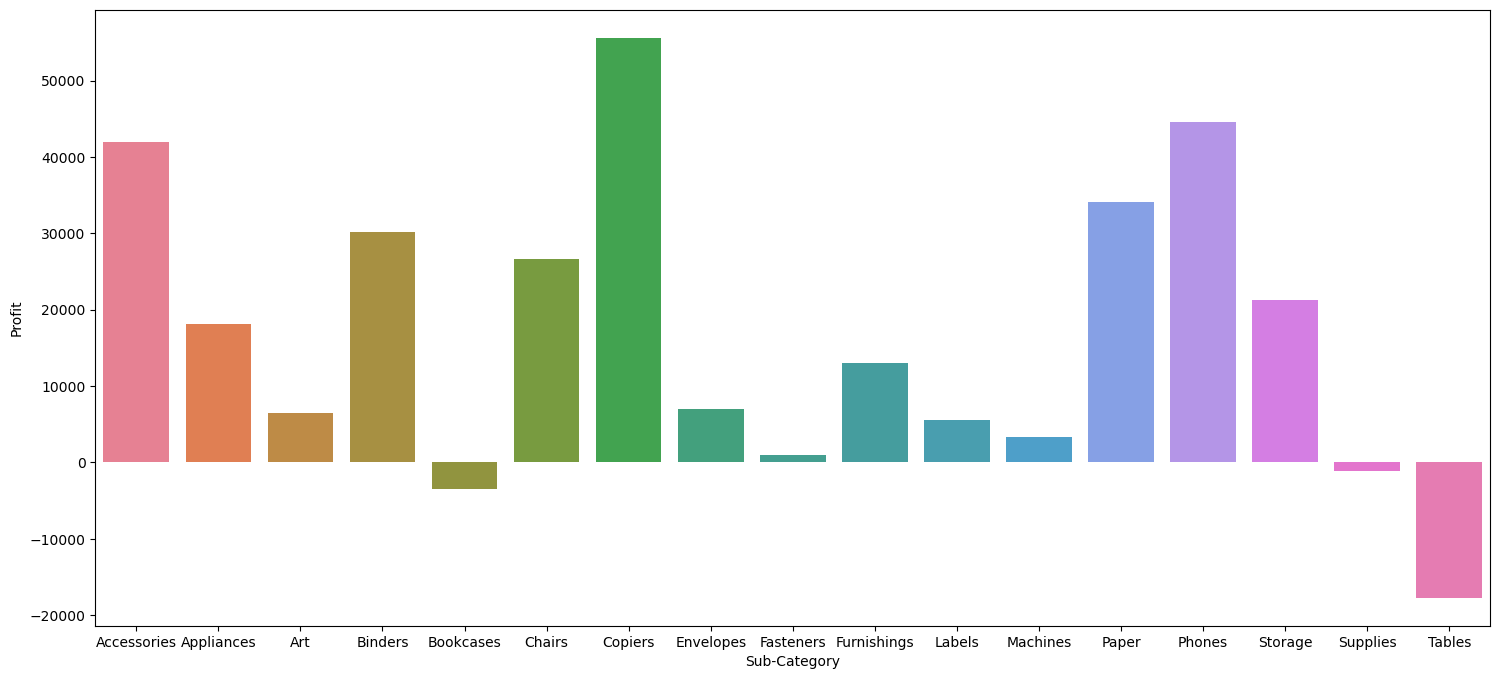

In [32]:
plt.figure(figsize=(18, 8))
sns.barplot(data =SubcategoryBy_profit,x ="Sub-Category",y="Profit",hue = "Sub-Category")
plt.show()

## Analyze the sales and profit by customer segment

In [34]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Order Day', 'Month_Name'],
      dtype='object')

In [35]:
sales_profit_by_segment= df.groupby("Segment").agg({"Sales":"sum","Profit":"sum"}).reset_index()
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


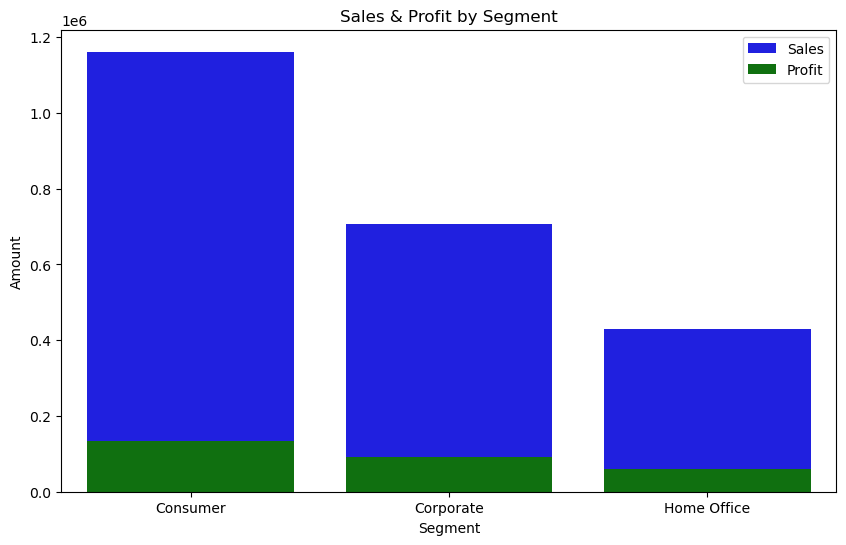

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Segment", y="Sales", data=sales_profit_by_segment, color="blue", label="Sales")
sns.barplot(x="Segment", y="Profit", data=sales_profit_by_segment, color="green", label="Profit")
plt.xlabel("Segment")
plt.ylabel("Amount")
plt.title("Sales & Profit by Segment")
plt.legend()
plt.show()

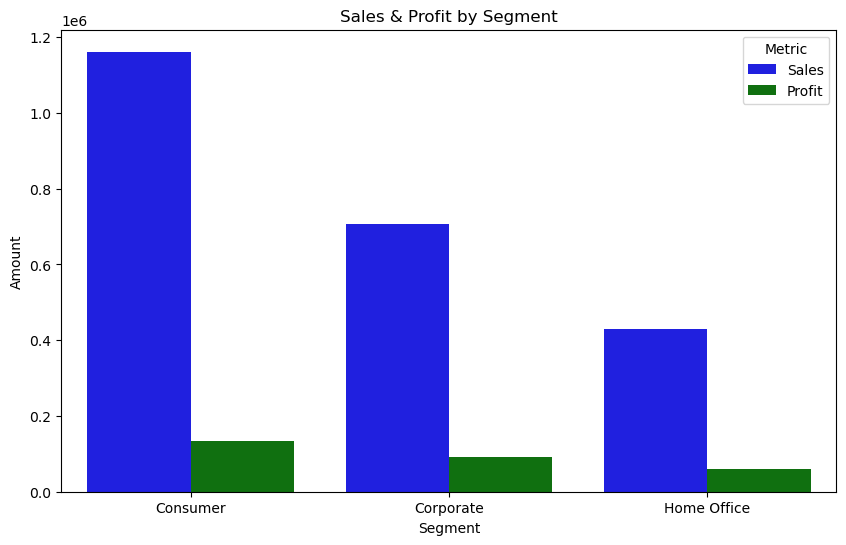

In [37]:
df_melted = sales_profit_by_segment.melt(id_vars="Segment", var_name="Metric", value_name="Amount")
plt.figure(figsize=(10, 6))
sns.barplot(x="Segment", y="Amount", hue="Metric", data=df_melted, palette=["blue", "green"])
plt.xlabel("Segment")
plt.ylabel("Amount")
plt.title("Sales & Profit by Segment")
plt.legend(title="Metric")
plt.show()

##  Analyze the sales to profit ratio

In [39]:
sales_profit_by_segment= df.groupby("Segment").agg({"Sales":"sum","Profit":"sum"}).reset_index()
sales_profit_by_segment["Sales Profit ratio"] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
sales_profit_by_segment[["Sales Profit ratio","Segment"]]

,Sales Profit ratio,Segment
0,8.659471,Consumer
1,7.677245,Corporate
2,7.125416,Home Office


##  compare yearly sales

In [42]:
yearly_sales = df.groupby("Order Year").agg({"Sales":"sum"})
yearly_sales

,Sales
Order Year,
2014,484247.4981
2015,470532.5090
2016,609205.5980
2017,733215.2552


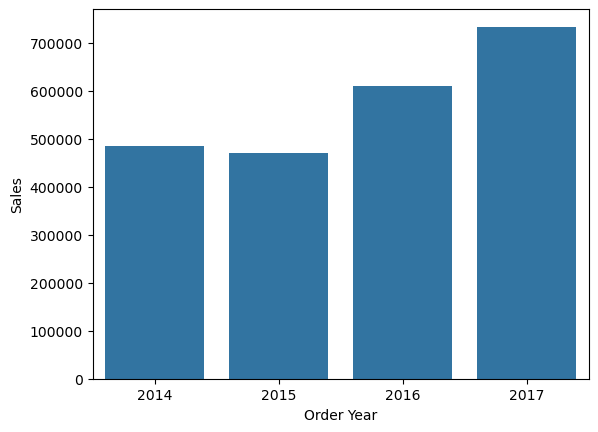

In [43]:
sns.barplot(data = yearly_sales,x = "Order Year",y= "Sales")
plt.show()

## compare yearly profit

In [45]:
yearly_profit = df.groupby("Order Year").agg({"Profit":"sum"})
yearly_profit

,Profit
Order Year,
2014,49543.9741
2015,61618.6037
2016,81795.1743
2017,93439.2696


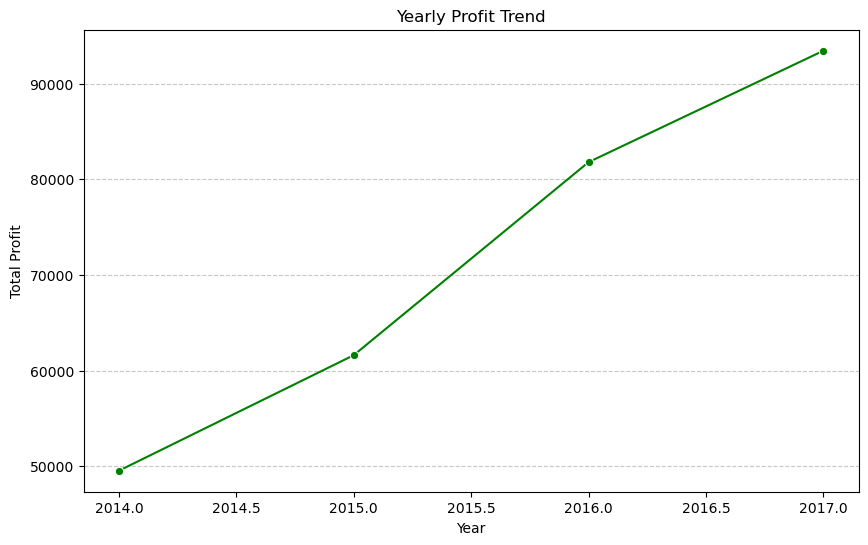

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Order Year", y="Profit", data=yearly_profit, marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Yearly Profit Trend")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()